# Live Code - 2


---



- Andik Al Fauzi - FTDS-RMT-018

# SQL Query


---



In [36]:
# SQL Query for Problem 2

# SELECT operation, property_type, price FROM `bigquery-public-data.properati_properties_ar.properties_rent_201501`
# WHERE (operation = 'rent')
# AND (property_type = 'apartment')

# Data Preparation


---



In [45]:
# Importing Library

import pandas as pd
import numpy as np 
import seaborn as sns
import statistics
from numpy import percentile
from numpy.linalg import linalg
import matplotlib
import matplotlib.pyplot as plt


In [ ]:
# Create DataFrame for Problem 1

Rumah = ['Rumah 1', 'Rumah 2']
LT = [100, 200]
LB = [240, 200]
JL = [3, 2]
JKT = [3, 2]
JKM = [2, 2]
HB = [0, 2]
Park = [1, 1]
DPK = [1, 1]
Harga = [800, 600]

list = {'Rumah': Rumah, 'Luas Tanah': LT, 'Luas Bangunan': LB, 'Jumlah Lantai': JL, 
        'Jumlah Kamar Tidur': JKT, 'Jumlah Kamar Mandi': JKM, 'Ada Halaman Belakang': HB,
        'Ada Parkiran': Park, 'Dekat Pusat Kota': DPK, 'Harga': Harga}

# Inserting list to DataFrame

dfProblem1 = pd.DataFrame(list)

In [16]:
# Show Dataframe Problem 1

dfProblem1

,Rumah,Luas Tanah,Luas Bangunan,Jumlah Lantai,Jumlah Kamar Tidur,Jumlah Kamar Mandi,Ada Halaman Belakang,Ada Parkiran,Dekat Pusat Kota,Harga
0,Rumah 1,100,240,3,3,2,0,1,1,800
1,Rumah 2,200,200,2,2,2,2,1,1,600


In [20]:
# DFProblem1 without Column = Harga

dfProblem1Copy = dfProblem1.copy()

In [28]:
# Load Data CSV for 2nd Problem

dfProb2 = pd.read_csv('/content/h8dsft_P0LC3_Andik_Al_Fauzi.csv')

In [29]:
# Creata a copy data to make sure original data is untouchable

dfProb2Copy = dfProb2.copy()

In [33]:
# Check Data Head

dfProb2Copy.head(5)

,operation,property_type,price
0,rent,apartment,2500.0
1,rent,apartment,3500.0
2,rent,apartment,2850.0
3,rent,apartment,1850.0
4,rent,apartment,1000.0


In [34]:
# Check Data Tail

dfProb2Copy.tail(5)

,operation,property_type,price
1767,rent,apartment,500.0
1768,rent,apartment,500.0
1769,rent,apartment,500.0
1770,rent,apartment,500.0
1771,rent,apartment,500.0


In [31]:
# Cek Description Data

dfProb2Copy.describe()

,price
count,1658.000000
mean,5166.355247
std,8995.996301
min,0.000000
25%,0.000000
50%,2700.000000
75%,5500.000000
max,100000.000000


In [32]:
# Check Data info + Check missing value

dfProb2Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   operation      1772 non-null   object 
 1   property_type  1772 non-null   object 
 2   price          1658 non-null   float64
dtypes: float64(1), object(2)
memory usage: 41.7+ KB


note : ada missing value di column price yang nantinya akan kita handle

In [51]:
# Cek isnull

dfProb2Copy.isna().sum()

operation          0
property_type      0
price            114
dtype: int64

# Problem 1

---



In [21]:
# Drop column Harga untuk cosine similiarity / sesuai instruksi assignment yg mengabaikan kolom harga

dfProblem1Copy.drop(['Harga'], axis=1, inplace=True)

In [25]:
# Cek Hasil Drop

dfProblem1Copy

,Rumah,Luas Tanah,Luas Bangunan,Jumlah Lantai,Jumlah Kamar Tidur,Jumlah Kamar Mandi,Ada Halaman Belakang,Ada Parkiran,Dekat Pusat Kota
0,Rumah 1,100,240,3,3,2,0,1,1
1,Rumah 2,200,200,2,2,2,2,1,1


In [27]:
# Cosine Similiarity Function

# cosine = np.dot(dfProblem1Copy[0, 1]) / (linalg(0)*linalg(1))
# print("Cosine Similiarity : ", cosine)

# Problem 2

---





1.   Lakukan perhitungan central tendency (mean, median, modus) terhadap data sebelum dideteksi adanya anomali.



In [44]:
# Central Tendency (Mean, Median, Modus)

# Max Value

print('Nilai Max dari Column Price: ', dfProb2Copy.price.max())

# Min Value

print('Nilai Min dari Column Price: ', dfProb2Copy.price.min())

# Mean
print('Nilai Mean dari Column Price: ', dfProb2Copy.price.mean())

# Median
print('Nilai Median dari Column Price : ', dfProb2Copy.price.median())

# Modus
print('Nilai Modus dari Column Price : ', dfProb2Copy.price.mode())

Nilai Max dari Column Price:  100000.0
Nilai Min dari Column Price:  0.0
Nilai Mean dari Column Price:  5166.355247285886
Nilai Median dari Column Price :  2700.0
Nilai Modus dari Column Price :  0    0.0
dtype: float64


note : anomali terjadi di nilai modus `price` = 0, kemungkinan pembuat dataset miss untuk input. akan dihandle kemudian

2. Cek skewness data untuk mengetahui apakah data terdistribusi normal atau tidak.

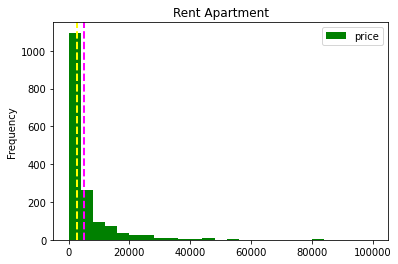

In [43]:
# Plot for Distribution Data

dfProb2Copy.plot.hist(title='Rent Apartment', color='green', bins=25)
plt.axvline(dfProb2Copy['price'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(dfProb2Copy['price'].median(), color='yellow', linestyle='dashed', linewidth=2)
plt.show()

Note : data terdistribusi dengan normal dengan kecendrungan Extreme positive skewness (Kemungkinan missing value blm terhandle)

In [40]:
# Function check skewness

print('Nilai Skewness dari Column Price : ',dfProb2Copy['price'].skew())

Nilai Skewness dari Column Price :  4.2401362864090695



3. Lakukan pengolahan data dengan menggunakan extreme value analysis.


In [113]:
# Define Percentile, Quartile & Extreme Value Function

Quartile = percentile(dfProb2Copy['price'], [25, 50, 75])

Quart0 = Quartile[0]
Quart1 = Quartile[1]
Quart2 = Quartile[2]

IQR = Quart2 - Quart0
nUpper = Quart2 + 1.5 * IQR
nLower = Quart0 - 1.5 * IQR

# Print Value
print('Quartile ke 0 dari Data : ', Quart0)
print('Quartile ke 1 dari Data : ', Quart1)
print('Quartile ke 2 dari Data : ', Quart2)
print('Nilai Extreme dari Data : ', IQR)
print('Nilai Upper dari Data : ', nUpper)
print('Nilai Lower dari Data : ', nLower)

Quartile ke 0 dari Data :  nan
Quartile ke 1 dari Data :  nan
Quartile ke 2 dari Data :  nan
Nilai Extreme dari Data :  nan
Nilai Upper dari Data :  nan
Nilai Lower dari Data :  nan


4. Buat variabel baru yang menyimpan data yang sudah dibuang data anomalinya

In [131]:
# Buat Dataframe baru untuk persiapan pembuangan data anomali

dfProb2Right = dfProb2Copy.copy()

In [132]:
# cek info
dfProb2Right.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   operation      1772 non-null   object 
 1   property_type  1772 non-null   object 
 2   price          1658 non-null   float64
dtypes: float64(1), object(2)
memory usage: 41.7+ KB


In [133]:
# Handle Missing Value with mean of price column

dfProb2Right['price'].fillna(dfProb2Right['price'].mean(), inplace=True)

In [134]:
# Handle Missing Value & price=0 with mean of price column

prob2Mean = dfProb2Right['price'].mean()

dfProb2Right['price'] = dfProb2Right['price'].replace(0, prob2Mean)

In [135]:
# Cek Summary Data

dfProb2Right.isnull().sum()

operation        0
property_type    0
price            0
dtype: int64

In [136]:
# Cek Replacing data price = 0 telah diisi dengan mean

dfProb2Right.price.value_counts()

5166.355247     567
2500.000000      55
3500.000000      54
3000.000000      42
2800.000000      41
               ... 
8700.000000       1
3060.000000       1
450.000000        1
21000.000000      1
6050.000000       1
Name: price, Length: 172, dtype: int64

Note : Missing value sudah terisi dengan nilai mean dari kolom `price`

In [137]:
# Central Tendency (Mean, Median, Modus)

# Max Value

print('Nilai Max dari Column Price: ', dfProb2Right.price.max())

# Min Value

print('Nilai Min dari Column Price: ', dfProb2Right.price.min())

# Mean
print('Nilai Mean dari Column Price: ', dfProb2Right.price.mean())

# Median
print('Nilai Median dari Column Price : ', dfProb2Right.price.median())

# Modus
print('Nilai Modus dari Column Price : ', dfProb2Right.price.mode())

Nilai Max dari Column Price:  100000.0
Nilai Min dari Column Price:  450.0
Nilai Mean dari Column Price:  6487.099562760213
Nilai Median dari Column Price :  5166.355247285886
Nilai Modus dari Column Price :  0    5166.355247
dtype: float64


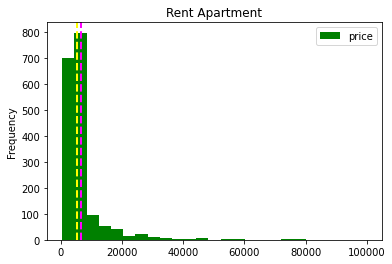

In [138]:
# Plot for Distribution Data

dfProb2Right.plot.hist(title='Rent Apartment', color='green', bins=25)
plt.axvline(dfProb2Right['price'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(dfProb2Right['price'].median(), color='yellow', linestyle='dashed', linewidth=2)
plt.show()

In [139]:
# Function check skewness

print('Nilai Skewness dari Column Price : ',dfProb2Right['price'].skew())

Nilai Skewness dari Column Price :  4.824798826542466


In [140]:
# Define Percentile, Quartile & Extreme Value Function

Quartile = percentile(dfProb2Right['price'], [25, 50, 75])

Quart0 = Quartile[0]
Quart1 = Quartile[1]
Quart2 = Quartile[2]

IQR = Quart2 - Quart0
nUpper = Quart2 + 1.5 * IQR
nLower = Quart0 - 1.5 * IQR

# Print Value
print('Quartile ke 0 dari Data : ', Quart0)
print('Quartile ke 1 dari Data : ', Quart1)
print('Quartile ke 2 dari Data : ', Quart2)
print('Nilai Extreme dari Data : ', IQR)
print('Nilai Upper dari Data : ', nUpper)
print('Nilai Lower dari Data : ', nLower)

Quartile ke 0 dari Data :  3000.0
Quartile ke 1 dari Data :  5166.355247285886
Quartile ke 2 dari Data :  5166.355247285886
Nilai Extreme dari Data :  2166.3552472858864
Nilai Upper dari Data :  8415.888118214716
Nilai Lower dari Data :  -249.53287092882965


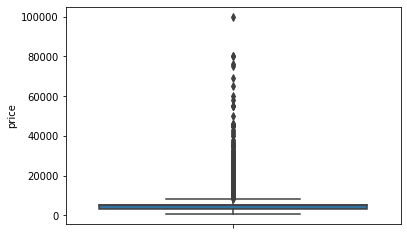

In [141]:
sns.boxplot(data = dfProb2Right, y = 'price')

note : ada banyak data outlier

In [144]:
# Function to find outlier

lowOutlier = []
maxOutlier = []

for i in dfProb2Right['price']:
  if (i < nLower) : 
    lowOutlier.append(i)
  if (i > nUpper) :
    maxOutlier.append(i)

print('Lower Outlier : ', lowOutlier)
print('Upper Outlier : \n', maxOutlier)

Lower Outlier :  []
Upper Outlier : 
 [15000.0, 12000.0, 9000.0, 19000.0, 30000.0, 13500.0, 45000.0, 12000.0, 16000.0, 9400.0, 9000.0, 13200.0, 23000.0, 18000.0, 80000.0, 12500.0, 46000.0, 13000.0, 12000.0, 46000.0, 12000.0, 16000.0, 27000.0, 12000.0, 12000.0, 15000.0, 16000.0, 14000.0, 15000.0, 10500.0, 20000.0, 25000.0, 30000.0, 8700.0, 35000.0, 9000.0, 16000.0, 13000.0, 17000.0, 11000.0, 25000.0, 30000.0, 10000.0, 8500.0, 69000.0, 60000.0, 10500.0, 9000.0, 8500.0, 13000.0, 9500.0, 50000.0, 45000.0, 20000.0, 80000.0, 14000.0, 36900.0, 15000.0, 27000.0, 17500.0, 27000.0, 18000.0, 19000.0, 33000.0, 27000.0, 8950.0, 34000.0, 9500.0, 12000.0, 8500.0, 23000.0, 18000.0, 15000.0, 15000.0, 18000.0, 55000.0, 10500.0, 19000.0, 25000.0, 20000.0, 16000.0, 13500.0, 20000.0, 8500.0, 32000.0, 27000.0, 11000.0, 27000.0, 9200.0, 12000.0, 12000.0, 12000.0, 25000.0, 20000.0, 18000.0, 24000.0, 27000.0, 75000.0, 20000.0, 16500.0, 22000.0, 35000.0, 25000.0, 41000.0, 16500.0, 14000.0, 11000.0, 9000.0, 9500

In [150]:
# Create kolom price_outlier untuk simpan hasil fungsi

dfProb2Right['price_outlier'] = False

for index, row in dfProb2Right.iterrows():
  if row['price'] > nUpper :
    dfProb2Right.at[index, 'price_outlier'] = True

In [151]:
# Input nilai ke kolom price_outlier yang diambil dari fungsi

prob2Outlier = dfProb2Right.groupby('price_outlier')['price'].mean()
prob2Outlier[0]

3989.097747136914

In [152]:
# Input nilai ke kolom price_outlier yang diambil dari fungsi

for index, row in dfProb2Right.iterrows():
  if row['price_outlier'] == True :
    dfProb2Right.at[index, 'price'] = prob2Outlier[0]

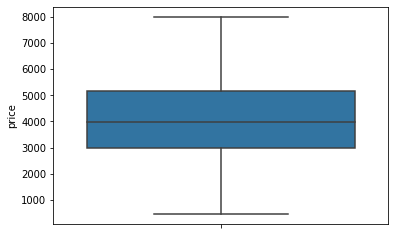

In [153]:
# Visualisasi outlier

sns.boxplot(data = dfProb2Right, y = 'price')

note : outlier sudah berhasil di handle

# Question Mark Problem 2

---





1.   Berapa rata-rata, median, dan modus dari data tersebut sebelum dihilangkan outliernya? Bagaimana kecerendungan pemusatan datanya? jelaskan jawabanmu!
- Nilai Mean = 6487.099562760213, median = 5166.355247285886 modus = 5166.355247
- Kecendrungan datanya bersifat extreme skewness, karena data `price` terdapat missing value dan banyak terdapat nilai 0, sehingga datanya kurang dapat tervalidasi dengan baik 
2. Sebelum melakukan extreme value analysis, kamu harus melakukan pengecekan skewness dari distribusi datanya. Apakah datanya skew atau normal? jelaskan jawabanmu!
- Datanya cenderung skew, karena nilai skew nya = 4.2401362864090695 yang menandakan masih banyak terdapat nilai `price` = 0 sehingga sangat mempengaruhi skewness
3. Ada dua teknik untuk melakukan extreme value analysis, teknik yang mana yang kamu pakai? berikan alasanmu berdasarkan data!
- Saya menggunakan metode IQR untuk menerapkan nilai Quartile dari data di kolom `price`, sehingga nantinya akan terlihat adanya nilai outlier yang lebih besar dari nilai Quartile dan lalu saya kombinasikan dengan menggunakan  BoxPlot, karena lebih mudah dalam visualisasinya. disana terdapat beberapa value yang dapat kita lihat sebanyak apa nilai outliernya.